<a href="https://colab.research.google.com/github/HarshithaVattikota/ImgtoPencilSketchusingpython/blob/Image/ImagetoPencilSketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
plt.style.use('seaborn')


<ipython-input-1-53d450dc7ddc>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


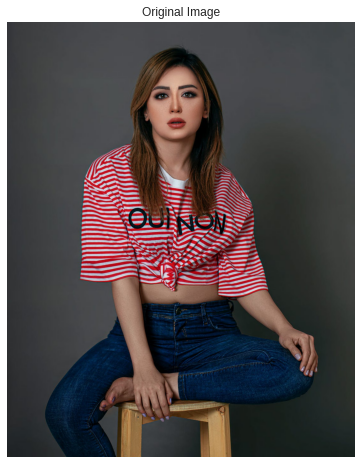

In [ ]:
img = cv2.imread("photo.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

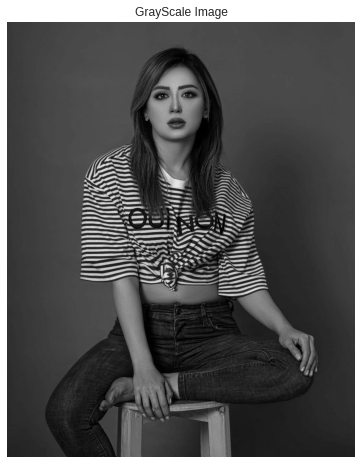

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(img_gray,cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.show()

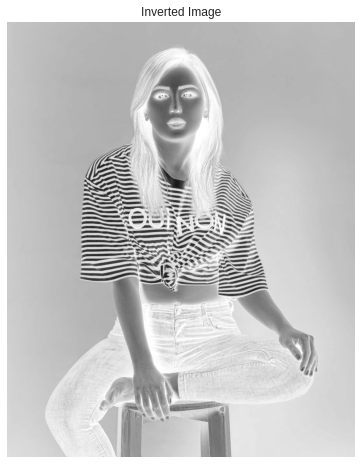

In [ ]:
img_invert = cv2.bitwise_not(img_gray)
plt.figure(figsize=(8,8))
plt.imshow(img_invert,cmap="gray")
plt.axis("off")
plt.title("Inverted Image")
plt.show()

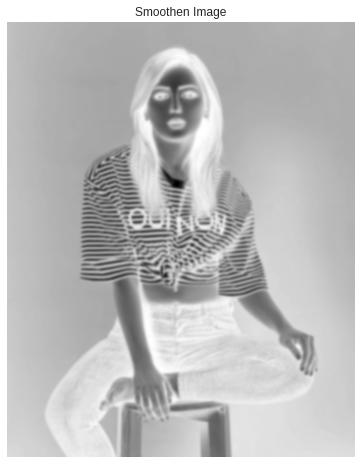

In [ ]:
img_smoothing = cv2.GaussianBlur(img_invert, (21, 21),sigmaX=0, sigmaY=0)
plt.figure(figsize=(8,8))
plt.imshow(img_smoothing,cmap="gray")
plt.axis("off")
plt.title("Smoothen Image")
plt.show()

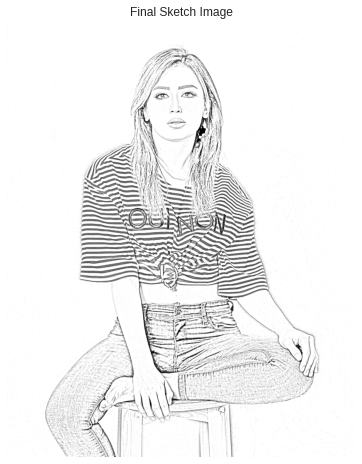

In [ ]:
final = cv2.divide(img_gray, 255 - img_smoothing, scale=255)
plt.figure(figsize=(8,8))
plt.imshow(final,cmap="gray")
plt.axis("off")
plt.title("Final Sketch Image")
plt.show()

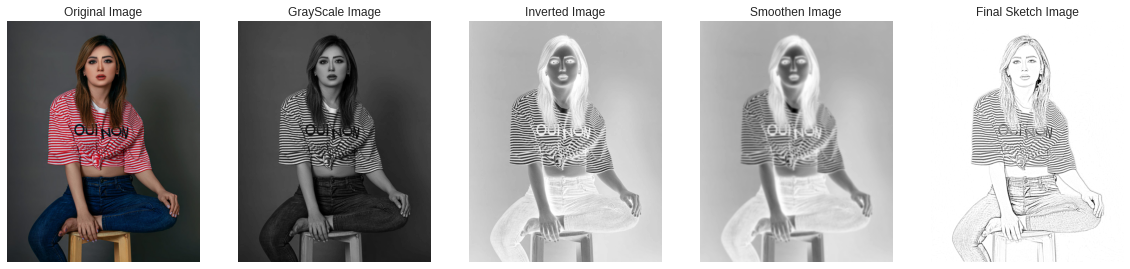

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,5,1)
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.subplot(1,5,2)
plt.imshow(img_gray,cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.subplot(1,5,3)
plt.imshow(img_invert,cmap="gray")
plt.axis("off")
plt.title("Inverted Image")
plt.subplot(1,5,4)
plt.imshow(img_smoothing,cmap="gray")
plt.axis("off")
plt.title("Smoothen Image")
plt.subplot(1,5,5)
plt.imshow(final,cmap="gray")
plt.axis("off")
plt.title("Final Sketch Image")
plt.show()

In [ ]:

# Python program to Convert Image into sketch
 
 
# import all the required modules
import numpy as np
import imageio
import scipy.ndimage
import cv2
 
 
# take image input and assign variable to it
img = "photo.jpg"
 
 
# function to convert image into sketch
def rgb2gray(rgb):
    # 2 dimensional array to convert image to sketch
    return np.dot(rgb[..., :3], [0.2989, 0.5870, .1140])
 
 
def dodge(front, back):
 
    # if image is greater than 255 (which is not possible) it will convert it to 255
    final_sketch = front*255/(255-back)
    final_sketch[final_sketch > 255] = 255
    final_sketch[back == 255] = 255
 
    # to convert any suitable existing column to categorical type we will use aspect function
    # and uint8 is for 8-bit signed integer
    return final_sketch.astype('uint8')
 
 
ss = imageio.imread(img)
gray = rgb2gray(ss)
 
i = 255-gray
 
 
# to convert into a blur image
blur = scipy.ndimage.filters.gaussian_filter(i, sigma=13)
 
 
# calling the function
r = dodge(blur, gray)
 
 
cv2.imwrite('4.png', r)

<ipython-input-9-1b3aecf742b8>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ss = imageio.imread(img)
<ipython-input-9-1b3aecf742b8>:40: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  blur = scipy.ndimage.filters.gaussian_filter(i, sigma=13)


True

In [ ]:

import cv2
image = cv2.imread('photo.jpg')  # loads an image from the specified file
# convert an image from one color space to another
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
invert = cv2.bitwise_not(grey_img)  # helps in masking of the image
# sharp edges in images are smoothed while minimizing too much blurring
blur = cv2.GaussianBlur(invert, (21, 21), 0)
invertedblur = cv2.bitwise_not(blur)
sketch = cv2.divide(grey_img, invertedblur, scale=256.0)
cv2.imwrite("sketch.png", sketch) 

True